In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
data=pd.read_csv('collected_data.csv')

/tmp/ipykernel_13699/2631229250.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('collected_data.csv')


In [4]:
data=data.iloc[:,1:]

In [5]:
data.dropna(inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,glucose_value
0,49.68,47.12,44.58,42.45,40.89,39.91,39.32,38.88,38.31,37.38,...,-15.00,-19.08,-23.39,-27.69,-31.82,-35.76,-39.59,-43.40,-47.28,93.0
1,33.74,31.12,28.13,25.00,21.88,18.75,15.47,12.01,8.48,5.16,...,-39.81,-43.21,-47.25,-51.93,-57.00,-61.89,-65.81,-67.86,-67.38,93.0
2,48.0,50.01,50.82,50.69,49.82,48.15,45.41,41.36,36.00,29.71,...,58.63,54.62,50.25,46.02,42.15,38.63,35.47,32.70,30.51,92.0
3,-13.66,-14.20,-14.84,-15.84,-17.35,-19.29,-21.35,-23.06,-23.84,-23.24,...,-52.09,-46.36,-38.11,-28.03,-16.95,-5.65,5.19,15.07,23.62,93.0
4,-13.53,-16.02,-18.58,-21.00,-23.18,-25.14,-26.96,-28.74,-30.58,-32.49,...,-16.67,-18.54,-19.92,-21.04,-22.18,-23.56,-25.34,-27.48,-29.84,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29139,-69.7,-70.61,-73.68,-80.54,-91.94,-106.73,-121.82,-131.85,-130.65,-113.06,...,33.00,52.97,73.62,91.91,105.17,111.43,109.57,99.25,81.26,127.0
29140,-33.12,-34.10,-34.54,-35.13,-36.18,-37.67,-39.00,-39.53,-38.61,-36.10,...,7.70,10.25,12.71,15.41,18.26,20.85,22.81,23.82,23.84,125.0
29141,53.13,51.26,49.21,47.45,46.60,47.21,49.45,53.11,57.60,62.35,...,17.17,15.91,12.57,7.10,-0.03,-7.77,-14.89,-20.36,-23.73,126.0
29142,-150.29,-139.96,-127.58,-113.64,-98.61,-83.06,-67.45,-52.40,-38.36,-25.71,...,7.56,6.04,5.58,6.07,7.13,8.32,9.30,9.92,10.17,118.0


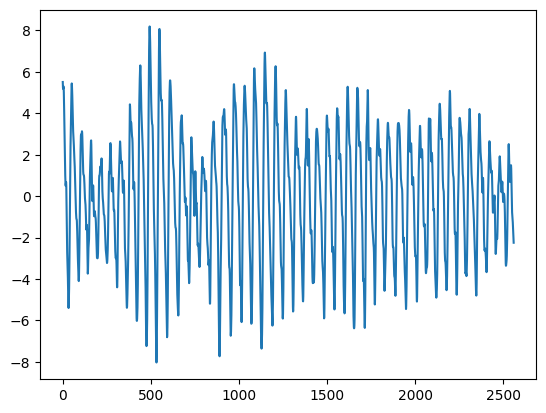

In [8]:
i=25416
plt.plot(np.array(data.iloc[i:i+1,0:2560]).ravel())

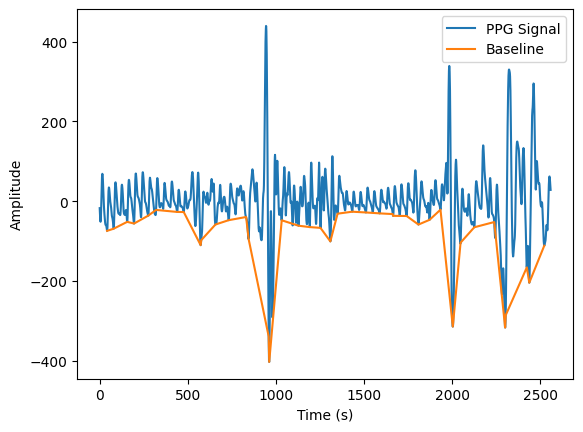

In [25]:
i=2777
ppg=np.array(data.iloc[i:i+1,0:2560]).ravel()
import numpy as np
from scipy.interpolate import CubicSpline

fs = 64 # Sampling frequency
t = np.arange(0, 40, 1/fs) # Time vector

# Set window size
win_size = 64 
x=[]
# Apply sliding window and find baseline for each window
baseline = np.zeros_like(ppg)
for i in range(0, 40):
    x.append(i*64 + np.argmin(ppg[i*64:i*64 +win_size]))
    
x=np.array(x)
y=ppg[x]
    
cs = CubicSpline(x, y)
baseline = cs(x)

plt.plot( ppg, label='PPG Signal')
plt.plot(x, baseline, label='Baseline')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

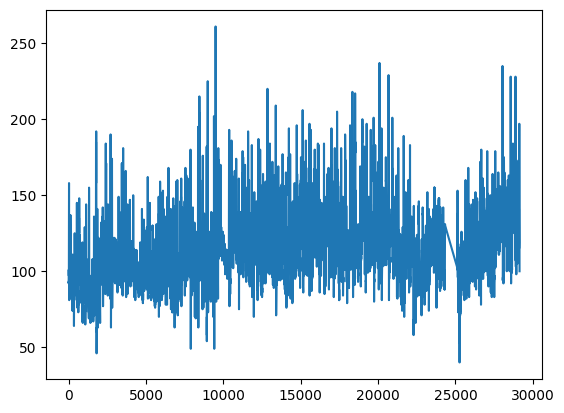

In [8]:
plt.plot(data['glucose_value'])

In [9]:
np.argmax(data['glucose_value'])

9497

In [12]:
data['glucose_value'][9497:9498]

9497    261.0
Name: glucose_value, dtype: float64

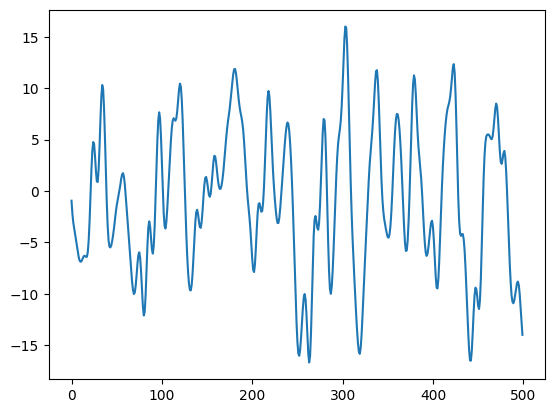

In [13]:
i=9497
plt.plot(np.array(data.iloc[i:i+1,0:2560]).ravel()[500:1000])

In [30]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,glucose_value
0,49.68,47.12,44.58,42.45,40.89,39.91,39.32,38.88,38.31,37.38,...,-15.00,-19.08,-23.39,-27.69,-31.82,-35.76,-39.59,-43.40,-47.28,93.0
1,33.74,31.12,28.13,25.00,21.88,18.75,15.47,12.01,8.48,5.16,...,-39.81,-43.21,-47.25,-51.93,-57.00,-61.89,-65.81,-67.86,-67.38,93.0
2,48.0,50.01,50.82,50.69,49.82,48.15,45.41,41.36,36.00,29.71,...,58.63,54.62,50.25,46.02,42.15,38.63,35.47,32.70,30.51,92.0
3,-13.66,-14.20,-14.84,-15.84,-17.35,-19.29,-21.35,-23.06,-23.84,-23.24,...,-52.09,-46.36,-38.11,-28.03,-16.95,-5.65,5.19,15.07,23.62,93.0
4,-13.53,-16.02,-18.58,-21.00,-23.18,-25.14,-26.96,-28.74,-30.58,-32.49,...,-16.67,-18.54,-19.92,-21.04,-22.18,-23.56,-25.34,-27.48,-29.84,95.0


In [32]:
data=data.iloc[:,1280:]
data.head()

,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,glucose_value
0,27.19,24.57,22.07,19.74,17.53,15.36,13.17,10.88,8.42,5.73,...,-15.00,-19.08,-23.39,-27.69,-31.82,-35.76,-39.59,-43.40,-47.28,93.0
1,-72.10,-74.84,-74.54,-70.81,-63.84,-54.37,-43.37,-31.88,-20.67,-10.13,...,-39.81,-43.21,-47.25,-51.93,-57.00,-61.89,-65.81,-67.86,-67.38,93.0
2,-306.12,-269.42,-225.67,-185.06,-153.12,-129.46,-109.32,-87.53,-61.45,-31.64,...,58.63,54.62,50.25,46.02,42.15,38.63,35.47,32.70,30.51,92.0
3,19.52,23.51,26.52,28.47,29.45,29.63,29.28,28.58,27.68,26.65,...,-52.09,-46.36,-38.11,-28.03,-16.95,-5.65,5.19,15.07,23.62,93.0
4,-2.69,-4.76,-6.82,-9.07,-11.64,-14.52,-17.50,-20.31,-22.71,-24.62,...,-16.67,-18.54,-19.92,-21.04,-22.18,-23.56,-25.34,-27.48,-29.84,95.0


In [33]:
data.shape

(28354, 1281)

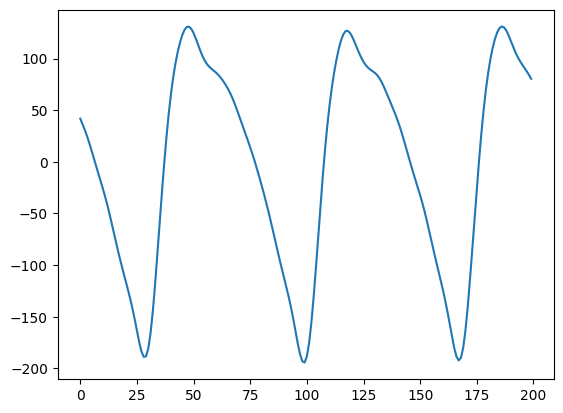

In [108]:
i=745
plt.plot(np.array(data.iloc[i:i+1,:]).ravel()[0:200])

In [36]:
data.to_csv('condensed_data.csv')

In [109]:
np.average(np.array(data.iloc[i:i+1,0:200]).ravel())

-3.4228499999999995

In [120]:
data2=[]
window=200
for row in range(data.shape[0]):
    for col in range(data.shape[1]-1):
        if np.abs(np.average(np.array(data.iloc[row:row+1,col:col+window]).ravel()))<=1 and data.iat[row,col+np.argmax(np.array(data.iloc[row:row+1,col:col+window]).ravel())]<=200 :
            data2.append(data.iloc[row:row+1,col:col+window])
            break
#     print(np.average(np.array(data.iloc[row:row+1,col:col+window]).ravel()))
print(sum)

28354


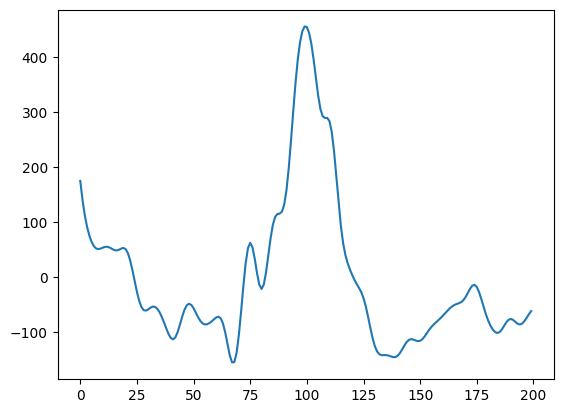

In [113]:
plt.plot(np.array(data.iloc[row:row+1,col:col+window]).ravel())

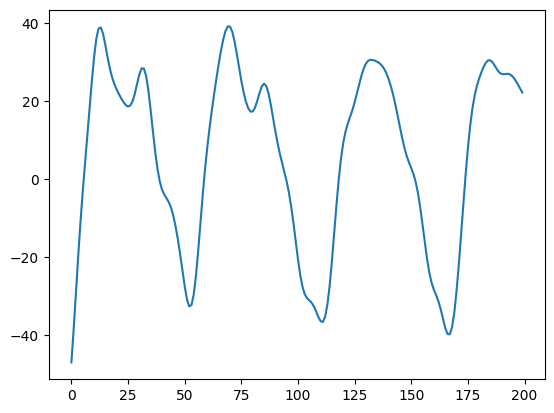

In [116]:
plt.plot(np.array(data.iloc[row:row+1,:]).ravel()[450:650])

In [117]:
np.argmax(np.array(data.iloc[row:row+1,:]).ravel()[450:650])

69

In [121]:
len(data2)

27176

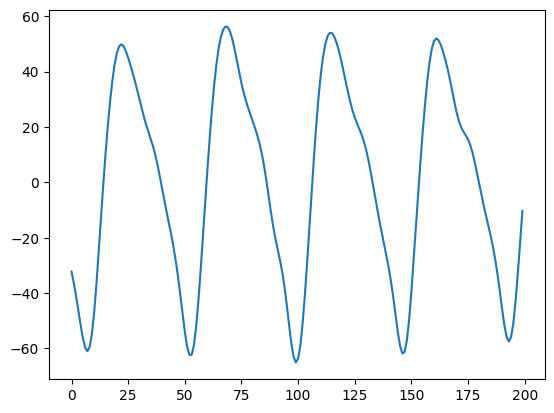

In [171]:
j=15421
plt.plot(np.array(data2[j]).ravel())

In [124]:
data2[27175]

,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,...,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761
29143,-32.13,-23.63,-14.52,-5.36,3.08,10.29,16.13,20.63,23.86,25.98,...,20.67,19.74,18.98,18.6,18.85,19.96,21.89,24.44,26.85,28.39


array([ -32.13,  -23.63,  -14.52,   -5.36,    3.08,   10.29,   16.13,
         20.63,   23.86,   25.98,   27.11,   27.31,   26.76,   25.44,
         23.31,   20.42,   16.86,   12.92,    9.17,    6.11,    4.17,
          3.61,    4.36,    6.11,    8.43,   10.63,   12.17,   12.67,
         11.85,    9.68,    6.45,    2.59,   -1.54,   -5.48,   -9.06,
        -12.11,  -14.55,  -16.45,  -17.94,  -19.1 ,  -19.94,  -20.56,
        -20.98,  -21.23,  -21.54,  -22.21,  -23.67,  -26.24,  -29.96,
        -34.32,  -38.44,  -41.16,  -41.4 ,  -38.76,  -33.49,  -26.38,
        -18.58,  -11.14,   -4.81,    0.17,    3.9 ,    6.72,    8.9 ,
         10.92,   13.22,   16.17,   19.99,   24.45,   29.04,   32.94,
         35.49,   36.14,   35.04,   32.78,   30.05,   27.65,   26.04,
         25.4 ,   25.58,   26.41,   27.42,   28.31,   28.8 ,   28.63,
         27.79,   26.48,   25.04,   23.77,   22.92,   22.39,   21.9 ,
         21.11,   19.71,   17.67,   15.22,   12.68,   10.36,    8.38,
          6.72,    5